# Banknote Authentication Using K-means Clustering

---
<p align="justify">This analysis uses K-Means clustering to group banknotes based on their physical measurements (diagonal, length, etc.). After preprocessing the data and determining the optimal number of clusters through the elbow method, the algorithm effectively separates genuine from counterfeit notes by identifying distinct patterns in their dimensional characteristics. This approach provides an automated framework for detecting potentially fraudulent currency.



---



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/fake_bills.csv', sep=';')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


## Data Preprocessing

In [4]:
# Drop the label column
X = df.drop('is_genuine', axis=1)

# Handle missing values
X = X.fillna(X.mean())

## Features Standardisation

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Determine the Optimal Number of Clusters Using the Elbow Method

In [6]:
wcss = [] # Create an empty list

k_values = range(1, 11)

for k in k_values:
  kmeans = KMeans(n_clusters=k,random_state=42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)

## Plot the Elbow Curve

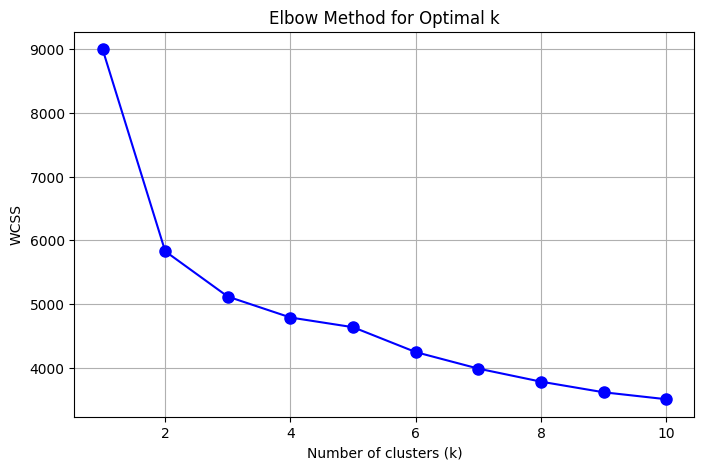

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

## Implement K-Means

In [8]:
k = 3
kmeans = KMeans(n_clusters=k,random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

## Apply PCA to reduce to 2 Dimension

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Plot the Clusters

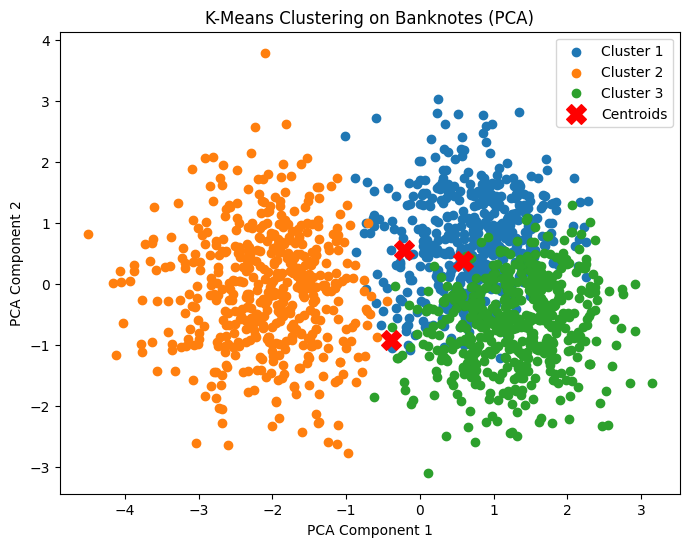

In [10]:
# Plot the clusterin 2D PCA space
plt.figure(figsize=(8, 6))
for i in range(k):
  plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering on Banknotes (PCA)')
plt.legend()
plt.show()

## Conclusion

<p align="justify">From the clustering analysis, we can conclude that the banknote dataset contains distinct patterns that can be grouped meaningfully using K-Means. The clustering revealed three separate groups, which may correspond to different categories of notes, such as genuine vs. counterfeit, or possibly different sources or types of counterfeit bills.

<p align="justify">The clear separation between clusters after PCA visualisation suggests that the chosen features hold enough information to distinguish between different types of notes without relying on labels.

<p align="justify">This shows that unsupervised methods like K-Means can be useful as an initial step in fraud detection or quality control, helping to flag potentially suspicious notes for further inspection. It also highlights that with well-prepared data, clustering can uncover underlying structures even when labels are unknown.